In [1]:
import pandas as pd
df = pd.read_csv('decision_tree_dataset.csv')
df

,StudyHours,SleepHours,Pass
0,4.370861,7.210158,0
1,9.556429,4.420700,1
2,7.587945,4.808144,1
3,6.387926,8.492771,1
4,2.404168,7.032145,0
...,...,...,...
195,4.142886,8.653787,1
196,7.533601,8.292064,1
197,9.073992,6.144970,1
198,8.983778,7.754355,1


In [2]:
df['Pass'].unique()

array([0, 1], dtype=int64)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudyHours  200 non-null    float64
 1   SleepHours  200 non-null    float64
 2   Pass        200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [5]:
df.corr()

,StudyHours,SleepHours,Pass
StudyHours,1.000000,-0.026887,0.803972
SleepHours,-0.026887,1.000000,0.277194
Pass,0.803972,0.277194,1.000000


Accuracy: 80.00%


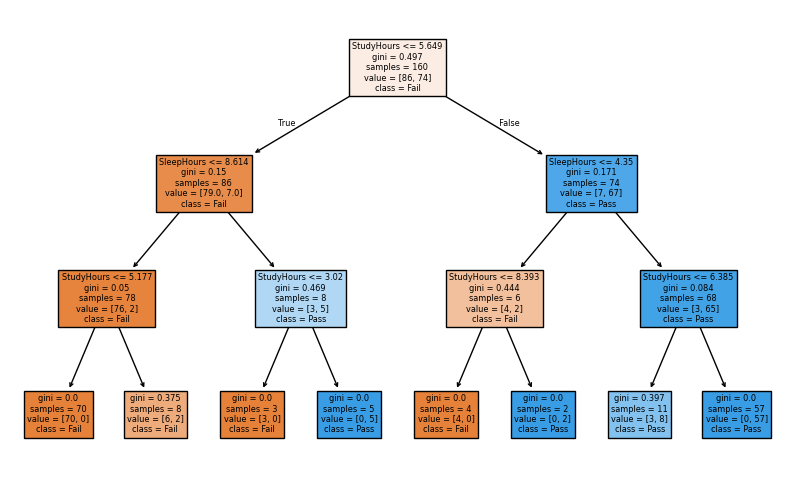

[0]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Pass'],axis=1)  # Features
y = df['Pass']  # Target

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 7: Visualize the Decision Tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['StudyHours', 'SleepHours'], class_names=['Fail', 'Pass'], filled=True)
plt.show()
print(clf.predict([[5,5]]))


# Calculations of Gini, entropy and others

In [115]:
import pandas as pd
df = pd.read_csv('Golf_Data.csv')

In [116]:
df

,Outlook,Temp,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [117]:
df = df.drop(14)
df

,Outlook,Temp,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [118]:
Total_sample = len(df)
Total_sample

14

In [120]:
DecisionCount_Yes = df['Decision'].value_counts()['Yes']
DecisionCount_No = df['Decision'].value_counts()['No']
DecisionCount_Yes, DecisionCount_No

(9, 5)

In [121]:
df.columns

Index(['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'], dtype='object')

In [122]:
# Feature: Outlook
df['Outlook'].unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

#Feature Outlook
Outlook     Count     Yes      No     Gini
Sunny       5          2        3     1-(2/5)**2-(3/5)**2
Overcast    4          4        0     1-(4/4)**2-(0/4)**2
Rain        5          3        2     1-(3/5)**2-(2/5)**2

In [123]:
def calc_Gini(frac1,frac2):
    res = 1-frac1**2-frac2**2
    return res

In [124]:
Gini_for_Sunny = calc_Gini(2/5,3/5)
Gini_for_Overcast = calc_Gini(4/4,0/4)
Gini_for_Rain = calc_Gini(3/5,2/5)
Gini_for_Sunny, Gini_for_Overcast, Gini_for_Rain 

(0.48, 0.0, 0.48)

### Weighted_Gini_for_Outlook

In [125]:
# Weighted_Gini_for_Outlook
Gini_Outlook = (5/14)*0.48 + (4/14)*0 + (5/14)*0.48
Gini_Outlook

0.34285714285714286

In [126]:
df

,Outlook,Temp,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [127]:
len(df[df['Temp'] == 'Hot']) , len(df[df['Temp'] == 'Mild']), len(df[df['Temp'] == 'Cool'])

(4, 6, 4)

In [128]:
df[df['Temp'] == 'Cool']

,Outlook,Temp,Humidity,Wind,Decision
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
8,Sunny,Cool,Normal,Weak,Yes


#For Temp
#Feature Temp
Temp     Count     Yes      No     Gini
Hot       4        2        2     1-(2/4)**2-(2/4)**2
Mild      6        4        2     1-(4/6)**2-(2/6)**2
Cool      4        3        1     1-(3/4)**2-(1/4)**2

In [44]:
def calc_Gini(frac1,frac2):
    res = 1-frac1**2-frac2**2
    return res

In [129]:
Gini_for_Hot = calc_Gini(2/4,2/4)
Gini_for_Mild = calc_Gini(4/6,2/6)
Gini_for_Cool = calc_Gini(3/4,1/4)
Gini_for_Hot,  Gini_for_Mild,   Gini_for_Cool

(0.5, 0.4444444444444445, 0.375)

### Weighted_Gini_for_Temp

In [130]:
weighted_Gini_Temp = (4/14)*0.5 + (6/14)*0.444 + (4/14)*0.375
weighted_Gini_Temp

0.4402857142857143

#Feature Humidity
#For Humidity
Temp     Count     Yes      No     Gini                     Entropy
High       7         3      4      1-(3/7)**2-(4/7)**2      -(3/7)*math.log2(3/7)-(4/7)*math.log2(4/7)
Normal     7         6      1     1-(6/7)**2-(1/7)**2       -(6/7)*math.log2(6/7)-(4/7)*math.log2(6/7)


In [131]:
def calc_Gini(frac1,frac2):
    res = 1-frac1**2-frac2**2
    return res

In [132]:
Gini_for_High = calc_Gini(3/7,4/7)
Gini_for_Normal = calc_Gini(6/7,1/7)
Gini_for_High, Gini_for_Normal

(0.489795918367347, 0.24489795918367355)

### Weighted_Gini_for_Humidity

In [53]:
weighted_Gini_Humidity = (7/14)*0.489 + (7/14)*0.245
weighted_Gini_Humidity

0.367

#Similarly the weighted gini of wind will be Wind 0.429
Feature   Weighted_Gini                   Weighted_Entropy
Outlook      0.3428                          0.692
Temp         0.44                            0.903
Humidity     0.367                           0.788
Wind         0.429                           0.894

Using Gini, the best feature to split on is Outlook (lowest Gini = 0.3428).
Using Entropy, the best feature to split on is Outlook (lowest Entropy = 0.692).

In [66]:
# calculations
Gini_Parent  = 1- (9/14)**2 - (5/14)**2
import math
Entropy_Parent = -(9/14*math.log2(9/14))-(5/14*math.log2(5/14))
Entropy_Parent ,Gini_Parent

(0.9402859586706311, 0.4591836734693877)

In [144]:
import pandas as pd
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,bank_asset_value,loan_status
0,1,9600000,29900000,12,778,2400000,8000000,Approved
1,2,4100000,12200000,8,417,2700000,3300000,Rejected
2,3,9100000,29700000,20,506,7100000,12800000,Rejected
3,4,8200000,30700000,8,467,18200000,7900000,Rejected
4,5,9800000,24200000,20,382,12400000,5000000,Rejected


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   income_annum              4269 non-null   int64 
 2   loan_amount               4269 non-null   int64 
 3   loan_term                 4269 non-null   int64 
 4   cibil_score               4269 non-null   int64 
 5   residential_assets_value  4269 non-null   int64 
 6   bank_asset_value          4269 non-null   int64 
 7   loan_status               4269 non-null   object
dtypes: int64(7), object(1)
memory usage: 266.9+ KB


In [146]:
df.columns

Index(['loan_id', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [147]:
X = df.drop(columns=['loan_status'],axis=1)
y = df['loan_status']

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [151]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',random_state=100, max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [153]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([' Approved', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Rejected', ' Rejected', ' Approved',
       ' Rejected', ' Rejected', ' Approved', ' Rejected', ' Approved',
       ' Rejected', ' Rejected', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Approved', ' Rejected', ' Approved', ' Approved',
       ' Rejected', ' Approved', ' Approved', ' Rejected', ' Approved',
       ' Approved', ' Rejected', ' Approved', ' Rejected', ' Approved',
       ' Approved', ' Rejected', ' Approved', ' Approved', ' Rejected',
       ' Rejected', ' Rejected', ' Approved', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Rejected', ' Rejected', ' Approved', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' App

In [155]:
clf_entropy.score(X_test,y_test)

0.9566744730679156

In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9566744730679156

[Text(0.5555555555555556, 0.875, 'x[4] <= 549.5\nentropy = 0.958\nsamples = 3415\nvalue = [2119, 1296]'),
 Text(0.3333333333333333, 0.625, 'x[3] <= 5.0\nentropy = 0.462\nsamples = 1423\nvalue = [139, 1284]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[2] <= 26150000.0\nentropy = 1.0\nsamples = 278\nvalue = [139, 139]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.984\nsamples = 239\nvalue = [102, 137]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.292\nsamples = 39\nvalue = [37, 2]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 1145\nvalue = [0, 1145]'),
 Text(0.7777777777777778, 0.625, 'x[5] <= 1050000.0\nentropy = 0.053\nsamples = 1992\nvalue = [1980, 12]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 30950000.0\nentropy = 0.247\nsamples = 293\nvalue = [281, 12]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.218\nsamples = 288\nvalue = [278, 10]'),
 Text(0.7777777777777778, 0.125, 'entr

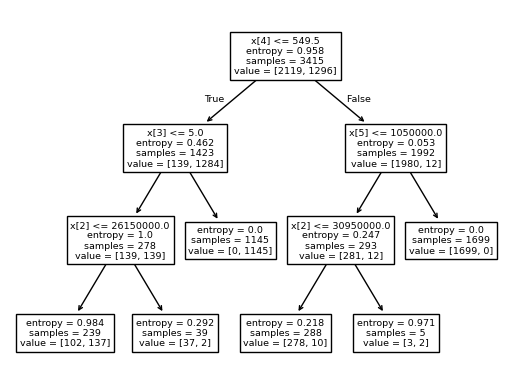

In [159]:
tree.plot_tree(clf_entropy)